## 卷积（局部相关性）

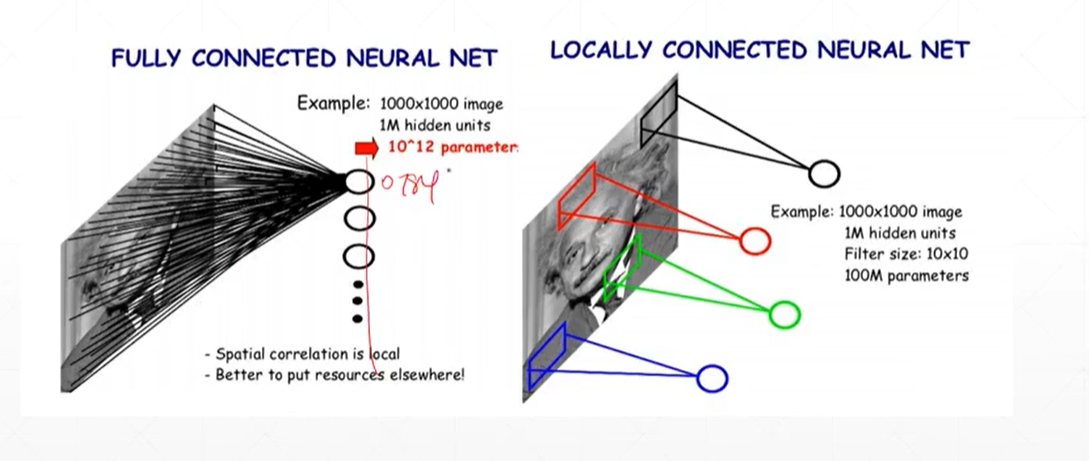

In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from torch import  nn
from torch.nn import functional as F
from torch import optim
import torchvision

## nn.Conv2d(增加卷积层)

In [5]:
layer=nn.Conv2d(1,3,kernel_size=3,stride=1,padding=0)
#1:input的channel   3：kernel的数量   kernel_size:大小3*3  
#stride:步长    padding:扩大图片的大小
x=torch.rand(1,1,28,28)
out=layer.forward(x)
print(out.size())

layer=nn.Conv2d(1,3,kernel_size=3,stride=1,padding=1)
x=torch.rand(1,1,28,28)
out=layer.forward(x)
print(out.size())


layer=nn.Conv2d(1,3,kernel_size=3,stride=2,padding=1)
x=torch.rand(1,1,28,28)
out=layer.forward(x)
print(out.size())

torch.Size([1, 3, 26, 26])
torch.Size([1, 3, 28, 28])
torch.Size([1, 3, 14, 14])


In [11]:
print(layer.weight)    #[3,1,3,3]
#这里的w/b是需要梯度信息的，需要进行更新
print(layer.weight.shape)
print(layer.bias.shape)

Parameter containing:
tensor([[[[ 0.1709, -0.1665, -0.2812],
          [ 0.2281,  0.2597,  0.1995],
          [ 0.0566, -0.2158, -0.0710]]],


        [[[ 0.0988, -0.2001, -0.2707],
          [-0.2957,  0.1529, -0.2904],
          [ 0.2941, -0.1609, -0.1006]]],


        [[[-0.3217, -0.0765, -0.1136],
          [-0.1032,  0.1253,  0.1741],
          [ 0.3159,  0.1520, -0.2646]]]], requires_grad=True)
torch.Size([3, 1, 3, 3])
torch.Size([3])


## 池化层

In [17]:
#subsampling(pooling降维)
x=torch.rand(1,16,14,14)
layer=nn.MaxPool2d(2,stride=2)  #大小：2*2  步长：2
out=layer(x)
print(out.size())
out=F.avg_pool2d(x,2,stride=2)
print(out.size())

#升维
out=F.interpolate(x,scale_factor=2,mode='nearest')#放大两倍
print(out.shape)


#relu函数：激活函数，把响应低的删除
#conv2d-->bor-->pooling-->relu
layer=nn.ReLU(inplace=True)
out=layer(x)
print(out.shape)
out=F.relu(x)
print(out.shape)

torch.Size([1, 16, 7, 7])
torch.Size([1, 16, 7, 7])
torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])
torch.Size([1, 16, 14, 14])


## Batch Norm(批量归一化)

In [18]:
x=torch.rand(100,16,784)  #一维   N（0，1）
layer=nn.BatchNorm1d(16)    #有16个channel
out=layer(x)
print(layer.running_mean)     #均值为0.5
print(layer.running_var)   #方差

tensor([0.0500, 0.0498, 0.0502, 0.0498, 0.0499, 0.0499, 0.0500, 0.0499, 0.0498,
        0.0501, 0.0499, 0.0501, 0.0499, 0.0499, 0.0500, 0.0501])
tensor([0.9084, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9084, 0.9083,
        0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083])


In [23]:
#二维
x=torch.rand(1,16,7,7)
layer=nn.BatchNorm2d(16)
out=layer(x)
print(out.shape)
print(layer.weight)
print(layer.weight.shape)
print(layer.bias.shape)
print(layer.eval())

torch.Size([1, 16, 7, 7])
Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True)
torch.Size([16])
torch.Size([16])
BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
